python implementation of [Patchwork](https://mattdesl.svbtle.com/pen-plotter-2)

In [1]:
import penkit
import sklearn
import shapely
import numpy as np
from sklearn.cluster import DBSCAN
from shapely.geometry import Point, MultiPoint, MultiLineString, LineString, MultiPolygon, Polygon

import random

In [2]:
N_POINTS = 5000
WIDTH = 300
HEIGHT = 300

In [32]:
def rand_between(a, b):
    return np.random.uniform(a, b)

def point(margin=2.0, min_x=0.0, min_y=0.0, max_x=WIDTH, max_y=HEIGHT):
    x = rand_between(min_x + margin, max_x - margin)
    y = rand_between(min_y + margin, max_y - margin)
    return Point(x,y)

def point_in_geom(geom):
    (min_x, min_y, max_x, max_y) = geom.bounds
    while True:
        candidate = point(margin=0.0, min_x=min_x, min_y=min_y, max_x=max_x, max_y=max_y)
        if candidate.within(geom):
            return candidate


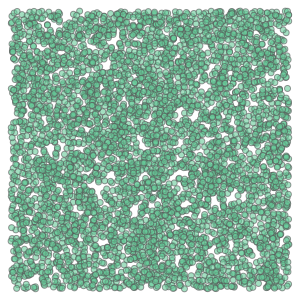

In [7]:
MultiPoint([point() for _ in range(N_POINTS)])

In [8]:
points = MultiPoint([point() for _ in range(N_POINTS)])

In [9]:
X = [[pt.x,pt.y] for pt in points]

## DBSCAN

In [51]:
clusters = DBSCAN(eps=float(WIDTH/20), min_samples=N_POINTS/100).fit_predict(X)
clusters

array([ 0,  0,  2,  1,  2, -1, 25, -1, 28, 24,  0,  3,  4,  5,  6,  7,  7,
        1, 12, -1,  8,  4,  1,  1,  9, -1,  6, -1,  6,  6, 10, -1, -1,  5,
        9, 10, -1, -1,  0,  9,  4, -1, 18,  0,  6, -1,  9, 20, -1,  4, 16,
        9, 11,  9, 12, 15,  0, 29, -1,  7, 12,  8,  1,  2, 13, -1, 14, 15,
       10, -1, -1, 29, 16, 17,  9,  2,  4, 16, 17, -1, 27, 18,  9, -1,  9,
       -1, -1, 19,  9, 15, -1, -1, 19, 10, 17, -1,  9, 18,  7, 18,  6, -1,
        8,  9,  4, 15, -1,  4, 17,  7,  4, 20, 27,  4, -1,  1,  9,  5,  9,
        3, -1,  6,  8, -1, 17,  9,  4, -1,  9,  9, 28,  9,  4, 21, 15,  4,
       22, 18, 29, 22, 21, -1, -1, 15,  0,  9,  6,  5,  0, -1, 28, -1,  9,
        4, 19, -1,  1, -1, 20,  4, 18, 16,  8,  9,  9, 19, 19, 23, -1,  5,
        2, 19,  6,  8,  1, 24, -1, -1, -1, 21, -1, 11, 17,  5,  4, 23,  1,
        4,  7,  3, 24,  4, 26, -1,  5, 26, 19, 25, -1,  5, -1,  8,  9, 16,
        4,  5, -1,  1,  0, -1, 21, -1,  5,  5,  4,  4, 26,  4,  4,  8, 12,
       27, 11,  9,  4, 14

In [56]:
np.where(clusters == 0)[0]

array([  0,   1,  10,  38,  43,  56, 144, 148, 208, 267, 271, 331, 349,
       368, 385, 427, 485, 490])

In [59]:
[points[i] for i in np.where(clusters == 0)[0]]

In [65]:
hulls = []
for c in range(clusters.max()):
    cluster = [points[i] for i in np.where(clusters == c)[0]]
    cluster = MultiPoint(cluster)
    hulls.append(cluster.convex_hull)

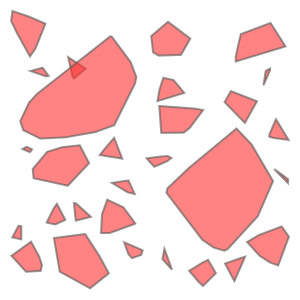

In [68]:
MultiPolygon(hulls)

## Agglomerative Clustering

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [87]:
# clusters = DBSCAN(eps=float(WIDTH/20), min_samples=N_POINTS/100).fit_predict(X)
# clusters

classifier = AgglomerativeClustering(n_clusters=int(N_POINTS/20), linkage='single')

In [80]:
clusters = classifier.fit_predict(np.array(X))

array([ 5,  5, 14, 15, 14, 20,  4, 13,  5, 19,  5,  9, 24, 11, 17, 10, 10,
       15, 10,  6,  0, 12, 15, 15,  9,  2, 17,  1, 17, 17,  8,  7,  3, 11,
       23,  8,  2, 19,  5,  1, 24,  2, 18,  5, 17, 11,  9,  1, 13, 24,  6,
        3,  7,  3, 10, 16,  5,  1,  6, 10, 10,  0, 15, 14, 19, 20,  7, 16,
        8,  2,  4,  1,  6, 22, 23, 14,  2,  6, 22, 13, 17, 18, 11, 13,  3,
        4,  7,  6,  1, 16,  7, 18,  6,  8, 22, 16,  9, 18, 10, 13, 17, 13,
        0,  1,  2, 16, 20, 21, 22, 10, 24,  1, 17,  8,  6, 15, 23, 11,  1,
        9,  7, 17,  0, 13, 22,  1, 21,  8, 23,  3,  5, 23, 12, 14, 16, 21,
        2, 13,  1,  2, 14,  5,  3, 16,  5,  1, 17, 11,  5, 14,  5,  4,  1,
       12,  6, 17, 15, 15,  1, 12, 18,  6,  0, 11,  9,  6,  6,  8,  6, 11,
       14,  6, 17,  0, 15, 19, 17, 13,  0, 14,  7,  7, 22, 11, 12,  8, 15,
       12, 10,  9, 19,  2, 16, 23,  4, 16,  6,  4,  7, 11,  2,  0,  1,  6,
       12,  4, 10, 15,  5,  3, 14, 13,  4, 11, 21,  2, 16,  2, 12,  0, 10,
       17,  7,  1, 21,  7

In [109]:
hulls = []

clusters = classifier.fit_predict(np.array(X))

for c in range(clusters.max()):
    cluster = [points[i] for i in np.where(clusters == c)[0]]
    if not cluster:
        continue
    cluster = MultiPoint(cluster)
    
    if cluster.convex_hull.buffer(1).area > 5.0:
        hulls.append(cluster.convex_hull.buffer(1))
#MultiPolygon(hulls)

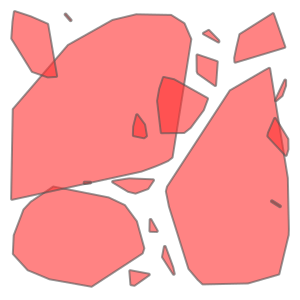

In [112]:
MultiPolygon(hulls)

## Iterative

In the original post, Matt only uses one cluster per iteration. This will avoid the problem that I'm having with overlapping clusters.

In [114]:
N_POINTS = 1000
WIDTH = 300
HEIGHT = 300

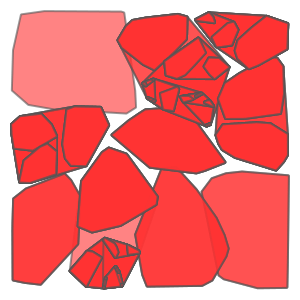

In [132]:
points = [point() for _ in range(N_POINTS)]
hulls = []

while len(points) > 10:
    #print(len(points))
    classifier = AgglomerativeClustering(n_clusters=10, linkage='average')
    X = [[pt.x,pt.y] for pt in points]
    clusters = classifier.fit_predict(np.array(X))
    
    largest_area = 0
    largest_cluster = 0
    largest_hull = None
    points_to_remove = []
    for c in range(clusters.max()):
        cluster = [points[i] for i in np.where(clusters == c)[0]]
        if not cluster:
            continue
        cluster = MultiPoint(cluster)
        hull = cluster.convex_hull.buffer(1)
        area = hull.area
        
        if area > largest_area:
            largest_area = area
            largest_cluster = c
            largest_hull = hull
            points_to_remove = np.where(clusters == c)[0]
            
        hulls.append(cluster.convex_hull.buffer(1))
    points = [points[i] for i in range(len(points)) if not i in points_to_remove]

MultiPolygon(hulls)

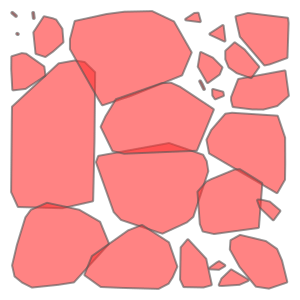

In [137]:


points = [point() for _ in range(N_POINTS)]
hulls = []

while len(points) > 10:
    #print(len(points))
    classifier = AgglomerativeClustering(n_clusters=10, linkage='average')
    X = [[pt.x,pt.y] for pt in points]
    clusters = classifier.fit_predict(np.array(X))
    
    largest_area = 0
    largest_cluster = 0
    largest_hull = None
    points_to_remove = []
    for c in range(clusters.max()):
        cluster = [points[i] for i in np.where(clusters == c)[0]]
        if not cluster:
            continue
        cluster = MultiPoint(cluster)
        hull = cluster.convex_hull.buffer(1)
        area = hull.area
        
        if area > largest_area:
            largest_area = area
            largest_cluster = c
            largest_hull = hull
            points_to_remove = np.where(clusters == c)[0]
            
    hulls.append(largest_hull)
    points = [points[i] for i in range(len(points)) if not i in points_to_remove]

MultiPolygon(hulls)

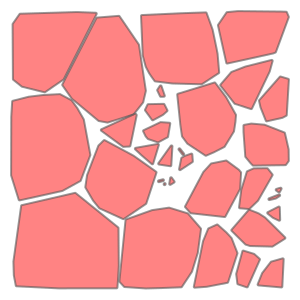

In [134]:
from sklearn.cluster import KMeans

points = [point() for _ in range(N_POINTS)]
hulls = []

while len(points) > 10:
    #print(len(points))
    classifier = KMeans(n_clusters=10)
    X = [[pt.x,pt.y] for pt in points]
    clusters = classifier.fit_predict(np.array(X))
    
    largest_area = 0
    largest_cluster = 0
    largest_hull = None
    points_to_remove = []
    for c in range(clusters.max()):
        cluster = [points[i] for i in np.where(clusters == c)[0]]
        if not cluster:
            continue
        cluster = MultiPoint(cluster)
        hull = cluster.convex_hull.buffer(1)
        area = hull.area
        
        if area > largest_area:
            largest_area = area
            largest_cluster = c
            largest_hull = hull
            points_to_remove = np.where(clusters == c)[0]
        
    hulls.append(largest_hull)
    points = [points[i] for i in range(len(points)) if not i in points_to_remove]

MultiPolygon(hulls)

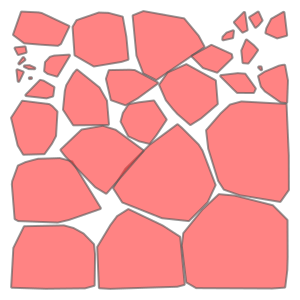

In [140]:
from sklearn.cluster import KMeans
N_POINTS = 1000
points = [point() for _ in range(N_POINTS)]
hulls = []

while len(points) > 10:
    #print(len(points))
    classifier = KMeans(n_clusters=10)
    X = [[pt.x,pt.y] for pt in points]
    clusters = classifier.fit_predict(np.array(X))
    
    largest_area = 0
    largest_cluster = 0
    largest_hull = None
    points_to_remove = []
    for c in range(clusters.max()):
        cluster = [points[i] for i in np.where(clusters == c)[0]]
        if not cluster:
            continue
        cluster = MultiPoint(cluster)
        hull = cluster.convex_hull.buffer(1)
        area = hull.area
        
        if area > largest_area:
            largest_area = area
            largest_cluster = c
            largest_hull = hull
            points_to_remove = np.where(clusters == c)[0]
        
    hulls.append(largest_hull)
    points = [points[i] for i in range(len(points)) if not i in points_to_remove]

MultiPolygon(hulls)

In [141]:
hulls_ = MultiPolygon(hulls)

In [146]:
hulls_.envelope.boundary.xy

(array('d', [1.2382709280994435, 298.95393259537303, 298.95393259537303, 1.2382709280994435, 1.2382709280994435]),
 array('d', [1.2407110955070455, 1.2407110955070455, 298.9286544454169, 298.9286544454169, 1.2407110955070455]))

In [42]:
from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering

def patch_geom(geom, classifier, n_points=1000):
    points = [point_in_geom(geom) for _ in range(n_points)]
    
    hulls = [] 
    
    while len(points) > 10:
        X = np.array([[pt.x,pt.y] for pt in points])
        clusters = classifier.fit_predict(X)

        largest_area = 0
        largest_cluster = 0
        largest_hull = None
        points_to_remove = []
        for c in range(clusters.max()):
            cluster = [points[i] for i in np.where(clusters == c)[0]]
            if not cluster:
                continue
            cluster = MultiPoint(cluster)
            hull = cluster.convex_hull.buffer(1)
            area = hull.area

            if area > largest_area:
                largest_area = area
                largest_cluster = c
                largest_hull = hull
                points_to_remove = np.where(clusters == c)[0]

        hulls.append(largest_hull)
        points = [points[i] for i in range(len(points)) if not i in points_to_remove]
    
    return hulls

In [43]:
import random

geoms = [Point(.0,.0).buffer(100.0)]
classifier = KMeans(n_clusters=10)

for _ in range(10):
    geom = geoms.pop(random.randrange(len(geoms)))
    geoms.extend(patch_geom(geom, classifier))

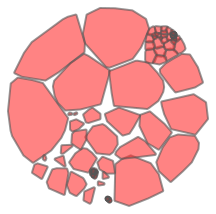

In [44]:
MultiPolygon(geoms)

In [45]:
import random

geoms = [Point(.0,.0).buffer(100.0)]
classifier = KMeans(n_clusters=10, init='random')

for _ in range(10):
    geom = geoms.pop(random.randrange(len(geoms)))
    geoms.extend(patch_geom(geom, classifier))

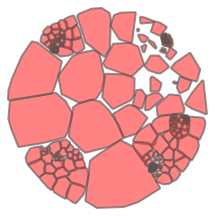

In [46]:
MultiPolygon(geoms)

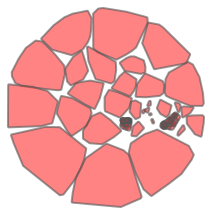

In [48]:
import random

geoms = [Point(.0,.0).buffer(100.0)]
classifier = KMeans(n_clusters=10, init='random', algorithm='elkan')

for _ in range(10):
    geom = geoms.pop(random.randrange(len(geoms)))
    geoms.extend(patch_geom(geom, classifier))
MultiPolygon(geoms)

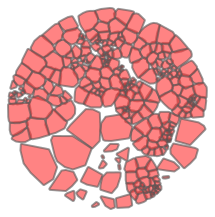

In [41]:
geoms = [Point(.0,.0).buffer(100.0)]

for _ in range(10):
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    geoms.extend(patch_geom(geom))

MultiPolygon(geoms)

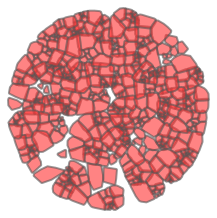

In [49]:
import random

geoms = [Point(.0,.0).buffer(100.0)]
classifier = KMeans(n_clusters=4, init='random', algorithm='elkan')

for _ in range(50):    
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    geoms.extend(patch_geom(geom, classifier))

MultiPolygon(geoms)

In [52]:
with open("patchwork-kmeans-clusters[4].svg", 'w') as f:
    f.write('<svg>\n\t')
    f.write(MultiPolygon(geoms).svg())
    f.write('</svg>\n')

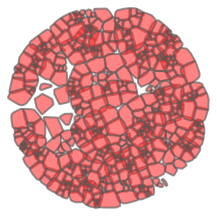

In [53]:
N_POINTS = 10000

import random

geoms = [Point(.0,.0).buffer(100.0)]
classifier = KMeans(n_clusters=4, init='random', algorithm='elkan')

for _ in range(50):    
    geoms.sort(key=lambda x: x.area)
    geom = geoms.pop()
    geoms.extend(patch_geom(geom, classifier))

MultiPolygon(geoms)

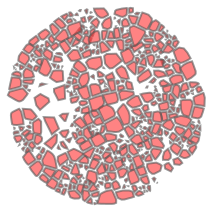

In [66]:
MultiPolygon([g.buffer(-1.91) for g in geoms])